<a href="https://colab.research.google.com/github/preethishas2022/Qiskit_exercise-13/blob/main/Qiskit_QFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer pylatexenc matplotlib -q

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


In [3]:
# ------------------------------------------------------------
# Helper Functions
# ------------------------------------------------------------
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc


def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc


def qft_circuit(n):
    """Build a standard QFT circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    return qc


def inverse_qft(n):
    """Build the inverse QFT circuit."""
    qc = QuantumCircuit(n)
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / 2 ** (j - m), m, j)
        qc.h(j)
    return qc


def simulate_measurement(qc):
    """Run the circuit and return measurement results."""
    simulator = AerSimulator()
    qc = qc.copy()
    qc.measure_all()
    transpiled = transpile(qc, simulator)
    result = simulator.run(transpiled, shots=1024).result()
    return result.get_counts()



🧩 TASK 1: QFT for 2, 3, and 4 Qubits

🔹 QFT Circuit for 2 Qubits


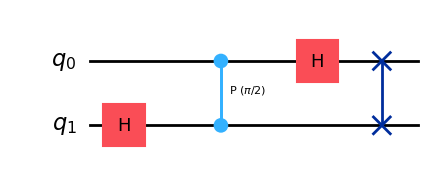

🔹 QFT Circuit for 3 Qubits


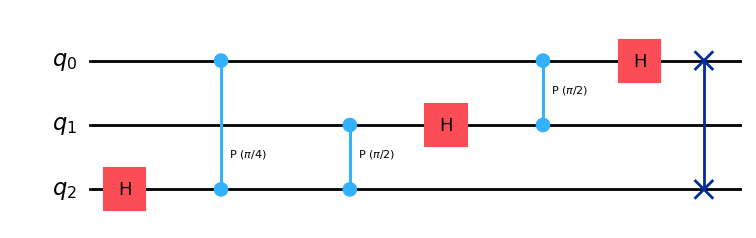

🔹 QFT Circuit for 4 Qubits


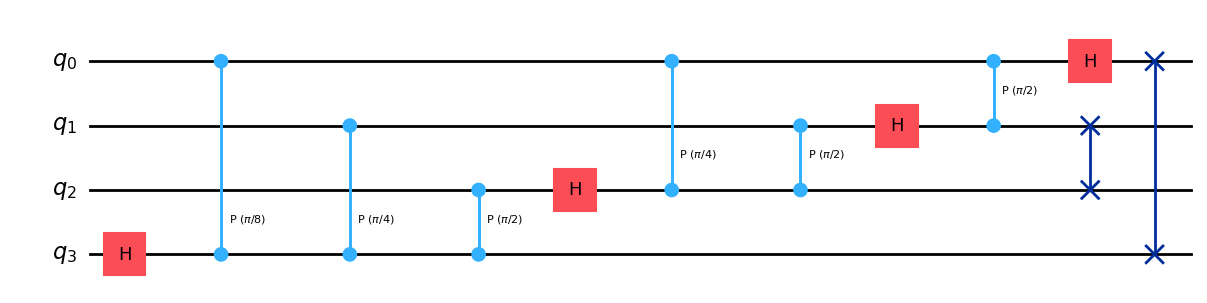

In [4]:
# ============================================================
# 🧩 TASK 1 — Vary the number of qubits (2, 3, 4)
# ============================================================
print("\n🧩 TASK 1: QFT for 2, 3, and 4 Qubits\n")

for n in [2, 3, 4]:
    qc = qft_circuit(n)
    print(f"🔹 QFT Circuit for {n} Qubits")
    display(qc.draw('mpl'))
    plt.show()



🧩 TASK 2: Inverse QFT Circuit

🔹 Inverse QFT (3 Qubits)


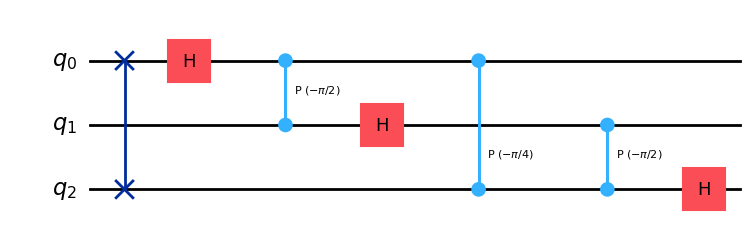

In [5]:

# ============================================================
# 🧩 TASK 2 — Inverse QFT
# ============================================================
print("\n🧩 TASK 2: Inverse QFT Circuit\n")

n = 3
qc_inv = inverse_qft(n)
print("🔹 Inverse QFT (3 Qubits)")
display(qc_inv.draw('mpl'))
plt.show()



🧩 TASK 3: Phase Estimation with QFT

🔹 Phase Estimation (with Inverse QFT on counting qubits)


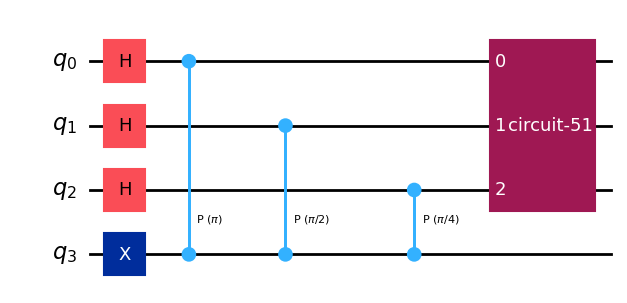

In [6]:
# ============================================================
# 🧩 TASK 3 — Integration with Phase Estimation
# ============================================================
print("\n🧩 TASK 3: Phase Estimation with QFT\n")

n_count = 3  # counting qubits
n_target = 1  # target qubit
qc_phase = QuantumCircuit(n_count + n_target)

# Prepare target qubit in |1>
qc_phase.x(n_count)

# Apply Hadamards to counting qubits
for q in range(n_count):
    qc_phase.h(q)

# Apply controlled-U^2^j gates (example: controlled phase)
for q in range(n_count):
    qc_phase.cp(np.pi / 2 ** q, q, n_count)

# Apply inverse QFT to counting qubits
inv_qft = inverse_qft(n_count)
qc_phase.append(inv_qft.to_gate(), range(n_count))

print("🔹 Phase Estimation (with Inverse QFT on counting qubits)")
display(qc_phase.draw('mpl'))
plt.show()


🧩 TASK 4: Measure Output States

Measurement counts:
{'101': 137, '110': 123, '001': 126, '011': 134, '111': 135, '100': 123, '000': 133, '010': 113}


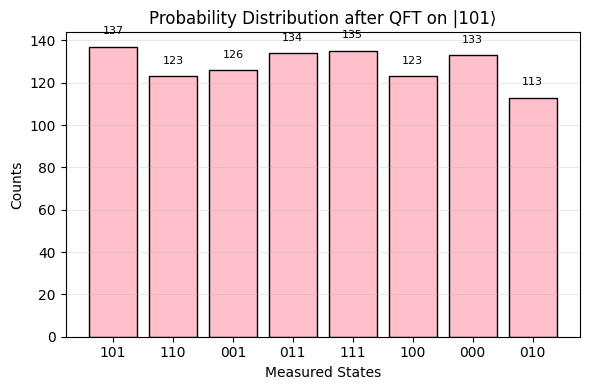

In [7]:
# ============================================================
# 🧩 TASK 4 — Measure Output States (Final Fixed Version)
# ============================================================
print("\n🧩 TASK 4: Measure Output States\n")

n = 3
qc_measure = QuantumCircuit(n)

# Prepare a visible state |101⟩
qc_measure.x(0)
qc_measure.x(2)

# Apply QFT
qc_measure.append(qft_circuit(n).to_gate(label="QFT"), range(n))

# Measure and simulate
counts = simulate_measurement(qc_measure)
print("Measurement counts:")
print(counts)
#Display
plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
bar = ax.bar(counts.keys(), counts.values(), color="pink", edgecolor="black")
ax.set_title("Probability Distribution after QFT on |101⟩")
ax.set_xlabel("Measured States")
ax.set_ylabel("Counts")
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.keys())
ax.grid(True, alpha=0.3, axis='y')

# Label bars with values
for rect in bar:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5,
            f"{int(height)}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [8]:
# ============================================================
# 🧩 TASK 5 — Circuit Visualization (Summary)
# ============================================================
print("\n🧩 TASK 5: Circuit Visualization Complete ✅")
print("All QFT-related circuits have been visualized using qc.draw('mpl').")



🧩 TASK 5: Circuit Visualization Complete ✅
All QFT-related circuits have been visualized using qc.draw('mpl').
